In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
file_path = r"C:\Users\91798\OneDrive\Desktop\Book1.xlsx"

# Define the sheet name to read data from
sheet_name = 'vs_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married       State  Number_of_Referrals  \
0   11596-KAR  Female   40      No   Karnataka                   15   
1   11604-HAR  Female   38     Yes     Haryana                    4   
2   11616-TAM    Male   26      No  Tamil Nadu                    6   
3   11647-GUJ    Male   44      No     Gujarat                    2   
4   11647-TAM    Male   81      No  Tamil Nadu                    1   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                11     Deal 4           Yes             No  ...   
1                 8        NaN           Yes            Yes  ...   
2                 2        NaN           Yes            Yes  ...   
3                 4     Deal 4           Yes            Yes  ...   
4                21        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      49.200001    571.150024           0.0   
1  Bank Withdrawal     104.400002 

In [12]:
#Data  processing
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1) #features
y = data['Customer_Status'] #target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Confusion Matrix:
[[829  36]
 [124 213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       865
           1       0.86      0.63      0.73       337

    accuracy                           0.87      1202
   macro avg       0.86      0.80      0.82      1202
weighted avg       0.87      0.87      0.86      1202



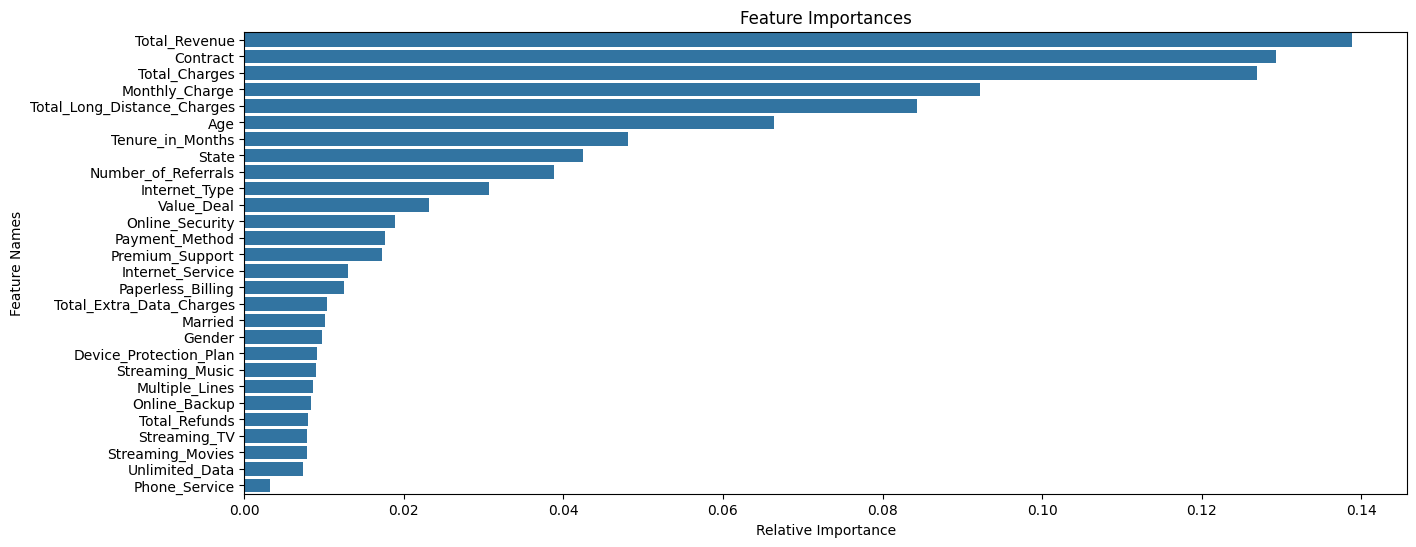

In [14]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [18]:
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\91798\OneDrive\Desktop\Book1.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_excel(r"C:\Users\91798\OneDrive\Desktop\Book1.xlsx", index=False)


  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   11751-TAM  Female   18      No     Tamil Nadu                    5   
1   15349-UTT    Male   47     Yes  Uttar Pradesh                    9   
2   17597-HAR  Female   33     Yes        Haryana                    2   
3   17796-BIH  Female   65      No          Bihar                    5   
4   18015-ODI  Female   28     Yes         Odisha                   15   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                12     Deal 5           Yes            Yes  ...   
2                 6     Deal 5            No             No  ...   
3                 1        NaN           Yes             No  ...   
4                 9        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdraw